# Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../../utils")
import project_utils  
dengue_data = pd.read_csv("../../data/processed/dengue_data.csv")
ovitraps_data = pd.read_csv("../../data/processed/ovitraps_data.csv")


C:\Users\User\AppData\Local\Temp\ipykernel_4412\2347983458.py:7: DtypeWarning: Columns (9,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue_data = pd.read_csv("../../data/processed/dengue_data.csv")


# Epidemic date

### Dengue

In [2]:
dengue_data_aux = dengue_data.copy()
dengue_data_aux['epidemic_date'] = project_utils.get_epidemic_date(dengue_data_aux)
date_list = dengue_data_aux.groupby(['epidemic_date'])['dt_notific'].agg(values=list, min_val="min", max_val="max", n_unique="nunique").reset_index()
print("Epidemic dates features:")
date_list


Epidemic dates features:


,epidemic_date,values,min_val,max_val,n_unique
0,2006_07W32,"[2007-01-06, 2007-01-01, 2007-01-04, 2007-01-03]",2007-01-01,2007-01-06,4
1,2006_07W33,"[2007-01-09, 2007-01-11, 2007-01-08, 2007-01-0...",2007-01-07,2007-01-12,5
2,2006_07W34,"[2007-01-17, 2007-01-15]",2007-01-15,2007-01-17,2
3,2006_07W35,"[2007-01-22, 2007-01-24, 2007-01-25, 2007-01-2...",2007-01-21,2007-01-27,7
4,2006_07W36,"[2007-02-02, 2007-01-29, 2007-01-31, 2007-02-0...",2007-01-29,2007-02-02,5
...,...,...,...,...,...
939,2024_25W40,"[2025-02-25, 2025-02-28, 2025-03-01, 2025-02-2...",2025-02-23,2025-03-01,7
940,2024_25W41,"[2025-03-05, 2025-03-03, 2025-03-07, 2025-03-0...",2025-03-02,2025-03-08,7
941,2024_25W42,"[2025-03-12, 2025-03-10, 2025-03-10, 2025-03-1...",2025-03-09,2025-03-15,7
942,2024_25W43,"[2025-03-20, 2025-03-17, 2025-03-20, 2025-03-1...",2025-03-16,2025-03-22,7


In [3]:
print("Epidemic dates for the first week:")
date_list[date_list['epidemic_date'].str.endswith('01')]

Epidemic dates for the first week:


,epidemic_date,values,min_val,max_val,n_unique
21,2007_08W01,"[2007-05-30, 2007-05-29, 2007-05-30, 2007-05-2...",2007-05-27,2007-06-02,7
72,2008_09W01,"[2008-06-07, 2008-06-01, 2008-06-05, 2008-06-0...",2008-06-01,2008-06-07,7
123,2009_10W01,"[2009-06-01, 2009-06-02, 2009-06-03, 2009-06-0...",2009-05-31,2009-06-06,7
173,2010_11W01,"[2010-05-30, 2010-06-03, 2010-06-04, 2010-06-0...",2010-05-30,2010-06-05,7
225,2011_12W01,"[2011-05-30, 2011-06-02, 2011-06-01, 2011-05-3...",2011-05-29,2011-06-04,7
277,2012_13W01,"[2012-06-01, 2012-06-01, 2012-06-01, 2012-06-0...",2012-05-28,2012-06-01,5
326,2013_14W01,"[2013-05-28, 2013-05-27, 2013-06-01, 2013-05-2...",2013-05-26,2013-06-01,7
379,2014_15W01,"[2014-06-05, 2014-06-06, 2014-06-02, 2014-06-0...",2014-06-01,2014-06-07,7
431,2015_16W01,"[2015-06-02, 2015-06-02, 2015-06-05, 2015-06-0...",2015-05-31,2015-06-06,7
483,2016_17W01,"[2016-05-29, 2016-06-02, 2016-06-02, 2016-05-3...",2016-05-29,2016-06-04,7


In [4]:
print("Values of epidemic dates for the first week in all years:")
for i in date_list[date_list['epidemic_date'].str.endswith('01')]['values']:
    print(i)

Values of epidemic dates for the first week in all years:
['2007-05-30', '2007-05-29', '2007-05-30', '2007-05-28', '2007-05-29', '2007-05-28', '2007-05-31', '2007-05-30', '2007-05-28', '2007-05-30', '2007-05-30', '2007-05-30', '2007-05-29', '2007-05-28', '2007-05-31', '2007-06-02', '2007-05-30', '2007-05-28', '2007-05-29', '2007-05-31', '2007-05-28', '2007-05-30', '2007-05-30', '2007-05-30', '2007-05-30', '2007-05-30', '2007-05-28', '2007-05-30', '2007-05-28', '2007-06-01', '2007-05-29', '2007-05-28', '2007-06-01', '2007-05-28', '2007-05-28', '2007-06-01', '2007-05-31', '2007-05-30', '2007-05-30', '2007-05-27', '2007-05-31', '2007-05-30', '2007-05-28', '2007-05-28', '2007-05-31', '2007-05-28', '2007-05-28', '2007-06-01', '2007-05-28', '2007-05-31', '2007-05-31', '2007-05-30', '2007-05-28', '2007-05-28', '2007-06-01', '2007-05-30', '2007-05-28', '2007-06-02', '2007-05-30', '2007-05-28', '2007-06-01', '2007-05-28', '2007-05-29', '2007-06-01', '2007-05-28', '2007-05-28', '2007-05-28', '20

After analysis, it was found that there's no consistency in the epidemic date assignment for dengue cases, because the epidemic week was in fact just the week of the year and that the assigned week is not always accurate. This is not shown anymore in this notebook because I've corrected the column during the processing phase.

 Thus, a new function was created to determine the epidemic date. It'll assign an epidemic year starting on the first Sunday before June 1st of each year and an epidemic week starting from that date. Weeks are numbered from 1 to 53 and start on Sunday. The next cell test these functions for multiple years.

In [5]:
def test_epidemic_date_function(year):
    weekdays_year = project_utils.week_days_of_year(year)
    week_epid_year, year_epid_year = project_utils.convert_week_df_to_epidemic_week_and_year(weekdays_year)

    print(f"Dates of weeks close to June 1st of year {year}:")
    display(weekdays_year.iloc[15:23])
    print(f"Epidemic year for year {year}:")
    display(year_epid_year.iloc[15:23])
    print(f"Epidemic week for year {year}:")
    display(week_epid_year.iloc[15:23])

test_epidemic_date_function(2006)
test_epidemic_date_function(2007)
test_epidemic_date_function(2008)
test_epidemic_date_function(2009)
test_epidemic_date_function(2010)
test_epidemic_date_function(2011)
test_epidemic_date_function(2012)
test_epidemic_date_function(2013)

Dates of weeks close to June 1st of year 2006:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2006-04-16,2006-04-17,2006-04-18,2006-04-19,2006-04-20,2006-04-21,2006-04-22
16,2006-04-23,2006-04-24,2006-04-25,2006-04-26,2006-04-27,2006-04-28,2006-04-29
17,2006-04-30,2006-05-01,2006-05-02,2006-05-03,2006-05-04,2006-05-05,2006-05-06
18,2006-05-07,2006-05-08,2006-05-09,2006-05-10,2006-05-11,2006-05-12,2006-05-13
19,2006-05-14,2006-05-15,2006-05-16,2006-05-17,2006-05-18,2006-05-19,2006-05-20
20,2006-05-21,2006-05-22,2006-05-23,2006-05-24,2006-05-25,2006-05-26,2006-05-27
21,2006-05-28,2006-05-29,2006-05-30,2006-05-31,2006-06-01,2006-06-02,2006-06-03
22,2006-06-04,2006-06-05,2006-06-06,2006-06-07,2006-06-08,2006-06-09,2006-06-10


Epidemic year for year 2006:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
16,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
17,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
18,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
19,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
20,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06,2005_06
21,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
22,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07


Epidemic week for year 2006:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,47,47,47,47,47,47,47
16,48,48,48,48,48,48,48
17,49,49,49,49,49,49,49
18,50,50,50,50,50,50,50
19,51,51,51,51,51,51,51
20,52,52,52,52,52,52,52
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2007:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2007-04-22,2007-04-23,2007-04-24,2007-04-25,2007-04-26,2007-04-27,2007-04-28
16,2007-04-29,2007-04-30,2007-05-01,2007-05-02,2007-05-03,2007-05-04,2007-05-05
17,2007-05-06,2007-05-07,2007-05-08,2007-05-09,2007-05-10,2007-05-11,2007-05-12
18,2007-05-13,2007-05-14,2007-05-15,2007-05-16,2007-05-17,2007-05-18,2007-05-19
19,2007-05-20,2007-05-21,2007-05-22,2007-05-23,2007-05-24,2007-05-25,2007-05-26
20,2007-05-27,2007-05-28,2007-05-29,2007-05-30,2007-05-31,2007-06-01,2007-06-02
21,2007-06-03,2007-06-04,2007-06-05,2007-06-06,2007-06-07,2007-06-08,2007-06-09
22,2007-06-10,2007-06-11,2007-06-12,2007-06-13,2007-06-14,2007-06-15,2007-06-16


Epidemic year for year 2007:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
16,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
17,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
18,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
19,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07,2006_07
20,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
21,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
22,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08


Epidemic week for year 2007:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,48,48,48,48,48,48,48
16,49,49,49,49,49,49,49
17,50,50,50,50,50,50,50
18,51,51,51,51,51,51,51
19,52,52,52,52,52,52,52
20,1,1,1,1,1,1,1
21,2,2,2,2,2,2,2
22,3,3,3,3,3,3,3


Dates of weeks close to June 1st of year 2008:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2008-04-20,2008-04-21,2008-04-22,2008-04-23,2008-04-24,2008-04-25,2008-04-26
16,2008-04-27,2008-04-28,2008-04-29,2008-04-30,2008-05-01,2008-05-02,2008-05-03
17,2008-05-04,2008-05-05,2008-05-06,2008-05-07,2008-05-08,2008-05-09,2008-05-10
18,2008-05-11,2008-05-12,2008-05-13,2008-05-14,2008-05-15,2008-05-16,2008-05-17
19,2008-05-18,2008-05-19,2008-05-20,2008-05-21,2008-05-22,2008-05-23,2008-05-24
20,2008-05-25,2008-05-26,2008-05-27,2008-05-28,2008-05-29,2008-05-30,2008-05-31
21,2008-06-01,2008-06-02,2008-06-03,2008-06-04,2008-06-05,2008-06-06,2008-06-07
22,2008-06-08,2008-06-09,2008-06-10,2008-06-11,2008-06-12,2008-06-13,2008-06-14


Epidemic year for year 2008:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
16,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
17,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
18,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
19,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
20,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08,2007_08
21,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
22,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09


Epidemic week for year 2008:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,48,48,48,48,48,48,48
16,49,49,49,49,49,49,49
17,50,50,50,50,50,50,50
18,51,51,51,51,51,51,51
19,52,52,52,52,52,52,52
20,53,53,53,53,53,53,53
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2009:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2009-04-19,2009-04-20,2009-04-21,2009-04-22,2009-04-23,2009-04-24,2009-04-25
16,2009-04-26,2009-04-27,2009-04-28,2009-04-29,2009-04-30,2009-05-01,2009-05-02
17,2009-05-03,2009-05-04,2009-05-05,2009-05-06,2009-05-07,2009-05-08,2009-05-09
18,2009-05-10,2009-05-11,2009-05-12,2009-05-13,2009-05-14,2009-05-15,2009-05-16
19,2009-05-17,2009-05-18,2009-05-19,2009-05-20,2009-05-21,2009-05-22,2009-05-23
20,2009-05-24,2009-05-25,2009-05-26,2009-05-27,2009-05-28,2009-05-29,2009-05-30
21,2009-05-31,2009-06-01,2009-06-02,2009-06-03,2009-06-04,2009-06-05,2009-06-06
22,2009-06-07,2009-06-08,2009-06-09,2009-06-10,2009-06-11,2009-06-12,2009-06-13


Epidemic year for year 2009:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
16,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
17,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
18,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
19,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
20,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09,2008_09
21,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
22,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10


Epidemic week for year 2009:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,47,47,47,47,47,47,47
16,48,48,48,48,48,48,48
17,49,49,49,49,49,49,49
18,50,50,50,50,50,50,50
19,51,51,51,51,51,51,51
20,52,52,52,52,52,52,52
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2010:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2010-04-18,2010-04-19,2010-04-20,2010-04-21,2010-04-22,2010-04-23,2010-04-24
16,2010-04-25,2010-04-26,2010-04-27,2010-04-28,2010-04-29,2010-04-30,2010-05-01
17,2010-05-02,2010-05-03,2010-05-04,2010-05-05,2010-05-06,2010-05-07,2010-05-08
18,2010-05-09,2010-05-10,2010-05-11,2010-05-12,2010-05-13,2010-05-14,2010-05-15
19,2010-05-16,2010-05-17,2010-05-18,2010-05-19,2010-05-20,2010-05-21,2010-05-22
20,2010-05-23,2010-05-24,2010-05-25,2010-05-26,2010-05-27,2010-05-28,2010-05-29
21,2010-05-30,2010-05-31,2010-06-01,2010-06-02,2010-06-03,2010-06-04,2010-06-05
22,2010-06-06,2010-06-07,2010-06-08,2010-06-09,2010-06-10,2010-06-11,2010-06-12


Epidemic year for year 2010:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
16,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
17,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
18,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
19,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
20,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10,2009_10
21,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
22,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11


Epidemic week for year 2010:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,47,47,47,47,47,47,47
16,48,48,48,48,48,48,48
17,49,49,49,49,49,49,49
18,50,50,50,50,50,50,50
19,51,51,51,51,51,51,51
20,52,52,52,52,52,52,52
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2011:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2011-04-17,2011-04-18,2011-04-19,2011-04-20,2011-04-21,2011-04-22,2011-04-23
16,2011-04-24,2011-04-25,2011-04-26,2011-04-27,2011-04-28,2011-04-29,2011-04-30
17,2011-05-01,2011-05-02,2011-05-03,2011-05-04,2011-05-05,2011-05-06,2011-05-07
18,2011-05-08,2011-05-09,2011-05-10,2011-05-11,2011-05-12,2011-05-13,2011-05-14
19,2011-05-15,2011-05-16,2011-05-17,2011-05-18,2011-05-19,2011-05-20,2011-05-21
20,2011-05-22,2011-05-23,2011-05-24,2011-05-25,2011-05-26,2011-05-27,2011-05-28
21,2011-05-29,2011-05-30,2011-05-31,2011-06-01,2011-06-02,2011-06-03,2011-06-04
22,2011-06-05,2011-06-06,2011-06-07,2011-06-08,2011-06-09,2011-06-10,2011-06-11


Epidemic year for year 2011:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
16,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
17,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
18,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
19,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
20,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11,2010_11
21,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
22,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12


Epidemic week for year 2011:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,47,47,47,47,47,47,47
16,48,48,48,48,48,48,48
17,49,49,49,49,49,49,49
18,50,50,50,50,50,50,50
19,51,51,51,51,51,51,51
20,52,52,52,52,52,52,52
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2012:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2012-04-15,2012-04-16,2012-04-17,2012-04-18,2012-04-19,2012-04-20,2012-04-21
16,2012-04-22,2012-04-23,2012-04-24,2012-04-25,2012-04-26,2012-04-27,2012-04-28
17,2012-04-29,2012-04-30,2012-05-01,2012-05-02,2012-05-03,2012-05-04,2012-05-05
18,2012-05-06,2012-05-07,2012-05-08,2012-05-09,2012-05-10,2012-05-11,2012-05-12
19,2012-05-13,2012-05-14,2012-05-15,2012-05-16,2012-05-17,2012-05-18,2012-05-19
20,2012-05-20,2012-05-21,2012-05-22,2012-05-23,2012-05-24,2012-05-25,2012-05-26
21,2012-05-27,2012-05-28,2012-05-29,2012-05-30,2012-05-31,2012-06-01,2012-06-02
22,2012-06-03,2012-06-04,2012-06-05,2012-06-06,2012-06-07,2012-06-08,2012-06-09


Epidemic year for year 2012:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
16,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
17,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
18,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
19,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
20,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12,2011_12
21,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
22,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13


Epidemic week for year 2012:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,47,47,47,47,47,47,47
16,48,48,48,48,48,48,48
17,49,49,49,49,49,49,49
18,50,50,50,50,50,50,50
19,51,51,51,51,51,51,51
20,52,52,52,52,52,52,52
21,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2


Dates of weeks close to June 1st of year 2013:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2013-04-21,2013-04-22,2013-04-23,2013-04-24,2013-04-25,2013-04-26,2013-04-27
16,2013-04-28,2013-04-29,2013-04-30,2013-05-01,2013-05-02,2013-05-03,2013-05-04
17,2013-05-05,2013-05-06,2013-05-07,2013-05-08,2013-05-09,2013-05-10,2013-05-11
18,2013-05-12,2013-05-13,2013-05-14,2013-05-15,2013-05-16,2013-05-17,2013-05-18
19,2013-05-19,2013-05-20,2013-05-21,2013-05-22,2013-05-23,2013-05-24,2013-05-25
20,2013-05-26,2013-05-27,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01
21,2013-06-02,2013-06-03,2013-06-04,2013-06-05,2013-06-06,2013-06-07,2013-06-08
22,2013-06-09,2013-06-10,2013-06-11,2013-06-12,2013-06-13,2013-06-14,2013-06-15


Epidemic year for year 2013:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
16,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
17,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
18,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
19,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13,2012_13
20,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14
21,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14
22,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14,2013_14


Epidemic week for year 2013:


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,48,48,48,48,48,48,48
16,49,49,49,49,49,49,49
17,50,50,50,50,50,50,50
18,51,51,51,51,51,51,51
19,52,52,52,52,52,52,52
20,1,1,1,1,1,1,1
21,2,2,2,2,2,2,2
22,3,3,3,3,3,3,3


### Ovitraps

In [6]:
ovitraps_data_aux = ovitraps_data.copy()
ovitraps_data_aux['epidemic_date'] = project_utils.get_epidemic_date(ovitraps_data_aux)


In [7]:
date_list_col = ovitraps_data_aux.groupby(['epidemic_date'])['dt_col'].agg(values=list, min_val="min", max_val="max", n_unique="nunique").reset_index()
pd.set_option('display.max_rows', None)
date_list_col

,epidemic_date,values,min_val,max_val,n_unique
0,2011_12W16,"[2011-09-21, 2011-09-21, 2011-09-21, 2011-09-2...",2011-09-19,2011-09-22,3
1,2011_12W17,"[2011-09-29, 2011-09-29, 2011-09-29, 2011-09-2...",2011-09-26,2011-09-29,4
2,2011_12W18,"[2011-10-05, 2011-10-05, 2011-10-05, 2011-10-0...",2011-10-05,2011-10-06,2
3,2011_12W19,"[2011-10-13, 2011-10-13, 2011-10-13, 2011-10-1...",2011-10-10,2011-10-14,4
4,2011_12W21,"[2011-10-24, 2011-10-24, 2011-10-24, 2011-10-2...",2011-10-24,2011-10-27,4
5,2011_12W23,"[2011-11-07, 2011-11-07, 2011-11-07, 2011-11-0...",2011-11-07,2011-11-11,5
6,2011_12W24,"[2011-11-14, 2011-11-14, 2011-11-14, 2011-11-1...",2011-11-14,2011-11-17,4
7,2011_12W25,"[2011-11-21, 2011-11-21, 2011-11-21, 2011-11-2...",2011-11-21,2011-11-25,4
8,2011_12W26,"[2011-11-28, 2011-11-28, 2011-11-28, 2011-11-2...",2011-11-28,2011-12-01,4
9,2011_12W27,"[2011-12-05, 2011-12-05, 2011-12-05, 2011-12-0...",2011-12-05,2011-12-09,4


In [8]:
date_list_col = ovitraps_data_aux.groupby(['epidemic_date'])['dt_instal'].agg(values=list, min_val="min", max_val="max", n_unique="nunique").reset_index()
pd.set_option('display.max_rows', None)
display(date_list_col)
pd.set_option('display.max_rows', 10)


,epidemic_date,values,min_val,max_val,n_unique
0,2011_12W16,"[2011-09-13, 2011-09-13, 2011-09-13, 2011-09-1...",2011-09-12,2011-09-15,4
1,2011_12W17,"[2011-09-22, 2011-09-22, 2011-09-22, 2011-09-2...",2011-09-19,2011-09-22,4
2,2011_12W18,"[2011-09-28, 2011-09-28, 2011-09-28, 2011-09-2...",2011-09-28,2011-09-29,2
3,2011_12W19,"[2011-10-06, 2011-10-06, 2011-10-06, 2011-10-0...",2011-10-03,2011-10-06,4
4,2011_12W21,"[2011-10-19, 2011-10-19, 2011-10-19, 2011-10-1...",2011-10-17,2011-10-20,4
5,2011_12W23,"[2011-10-31, 2011-10-31, 2011-10-31, 2011-10-3...",2011-10-31,2011-11-03,3
6,2011_12W24,"[2011-11-07, 2011-11-07, 2011-11-07, 2011-11-0...",2011-11-07,2011-11-10,4
7,2011_12W25,"[2011-11-16, 2011-11-16, 2011-11-16, 2011-11-1...",2011-11-14,2011-11-18,4
8,2011_12W26,"[2011-11-21, 2011-11-21, 2011-11-21, 2011-11-2...",2011-11-21,2011-11-24,4
9,2011_12W27,"[2011-11-28, 2011-11-28, 2011-11-28, 2011-11-2...",2011-11-28,2011-12-01,4


The ovitraps data had basically the same problem, plus the fact that the same trap have two dates: the collection date and the installation date. Since the function to convert to epidemic week was already created, it was used to convert both dates and then compare them. Basically, all the traps were collected in different weeks than they were installed.

The main problem here is to assign different epidemic years to the same trap. To compare the two ways, I created two datasets containing different epidemic dates and then compare their plots and the samples that were assigned to different years. Usually, only samples in the transition between years were assigned differently in both datasets. No outliers were found in this comparison.

But, after the plot inspection, I found that the installation date is the most appropriate to assign the epidemic date. The exposition period doesn't follow a pattern making the collection date errant. This explain also some outliers found before. Probably, in weeks know for not having traps (christmas and carnival), one trap with high count that is collected later than the other installed in the same week will increase the mean of the epidemic week in a completly unreasonable way. 

In [9]:
# Compare the two ways of assigning epidemic week to ovitraps data
ovitrap_epidemic_week_col = project_utils.assign_epidemic_week(ovitraps_data_aux, 'dt_col')
ovitrap_epidemic_week_instal = project_utils.assign_epidemic_week(ovitraps_data_aux, 'dt_instal')
print("Percentage of traps assigned to same week:",(ovitrap_epidemic_week_col == ovitrap_epidemic_week_instal).mean())

ovitraps_data_instal = ovitraps_data.copy()
ovitraps_data_instal['semepid'] = ovitrap_epidemic_week_instal
ovitraps_data_instal['anoepid'] = project_utils.assign_epidemic_year(ovitraps_data_instal, 'dt_instal')
ovitraps_data_instal['epidemic_date'] = project_utils.get_epidemic_date(ovitraps_data_instal)


ovitraps_data_col = ovitraps_data.copy()
ovitraps_data_col['semepid'] = ovitrap_epidemic_week_col
ovitraps_data_col['anoepid'] = project_utils.assign_epidemic_year(ovitraps_data_col, 'dt_col')
ovitraps_data_col['epidemic_date'] = project_utils.get_epidemic_date(ovitraps_data_col)

Percentage of traps assigned to same week: 4.200828841794959e-05


In [10]:
install_diff = ovitraps_data_instal[ovitraps_data_col['anoepid'] != ovitraps_data_instal['anoepid']][['anoepid','dt_col','dt_instal']]
col_diff = ovitraps_data_col[ovitraps_data_col['anoepid'] != ovitraps_data_instal['anoepid']][['anoepid','dt_col','dt_instal']]
pd.set_option('display.max_rows', 20)
print("Dates of samples assigned to different epidemic years in both install and collection dataframes:")
install_diff.groupby('anoepid').agg(min_col_date=('dt_col','min'), max_col_date=('dt_col','max'),  min_instal_date=('dt_instal','min'), max_instal_date=('dt_instal','max'))

Dates of samples assigned to different epidemic years in both install and collection dataframes:


,min_col_date,max_col_date,min_instal_date,max_instal_date
anoepid,,,,
2011_12,2012-05-28,2012-06-05,2012-05-21,2012-05-25
2012_13,2013-05-27,2013-05-29,2013-05-20,2013-05-23
2013_14,2014-06-02,2014-06-06,2014-05-26,2014-05-30
2014_15,2015-06-01,2015-06-08,2015-05-21,2015-05-29
2015_16,2016-05-30,2016-06-06,2016-05-18,2016-05-27
2016_17,2017-05-29,2017-06-02,2017-05-22,2017-05-26
2017_18,2018-05-28,2018-06-04,2018-05-15,2018-05-25
2018_19,2019-05-27,2019-05-31,2019-05-15,2019-05-24
2019_20,2020-06-01,2020-06-05,2020-05-25,2020-05-29


Epidemic Year: 2011_12 


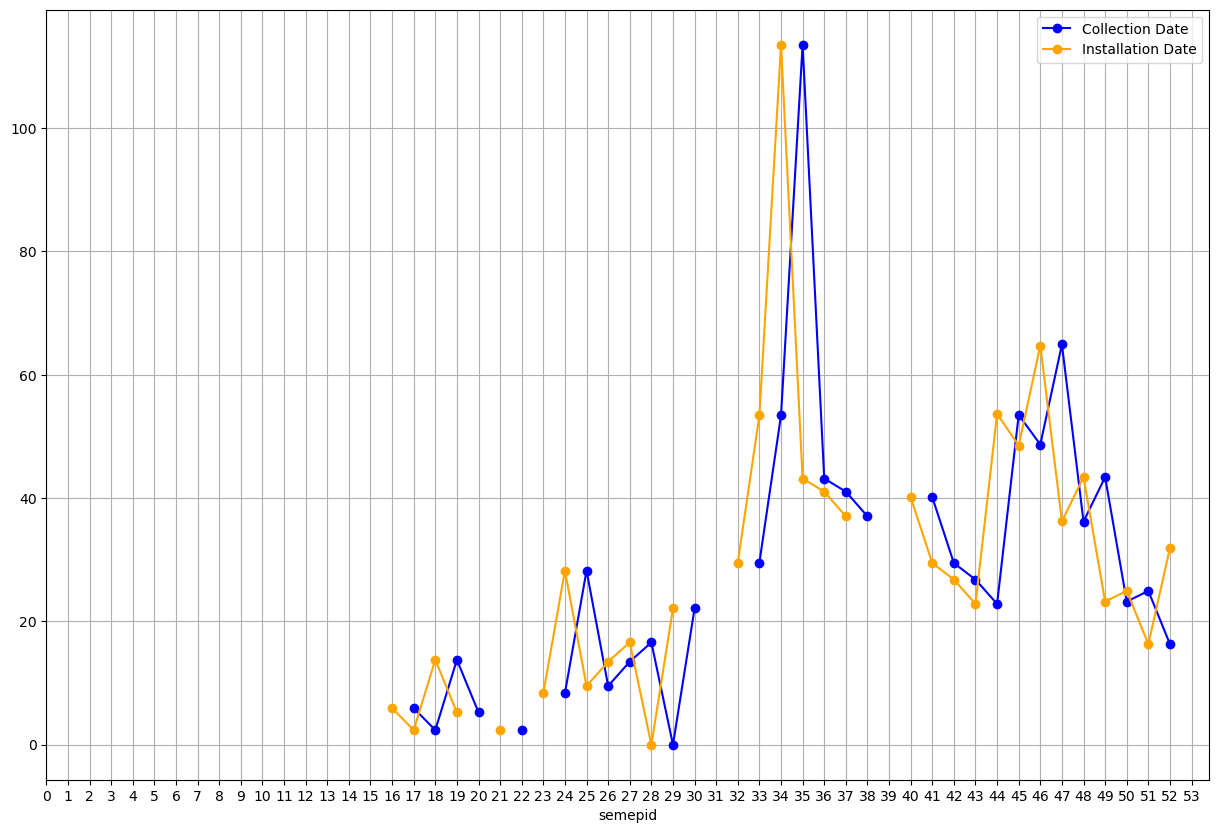




Epidemic Year: 2012_13 *


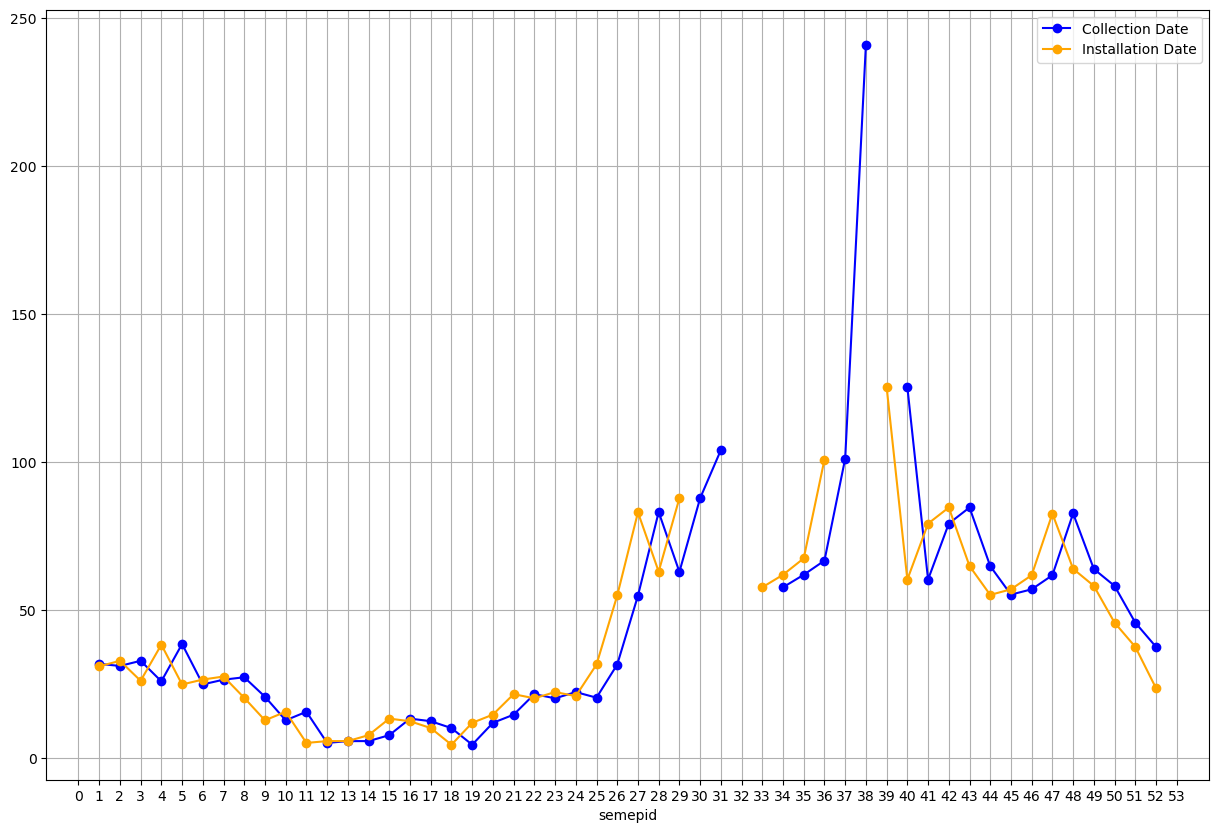




Epidemic Year: 2013_14 


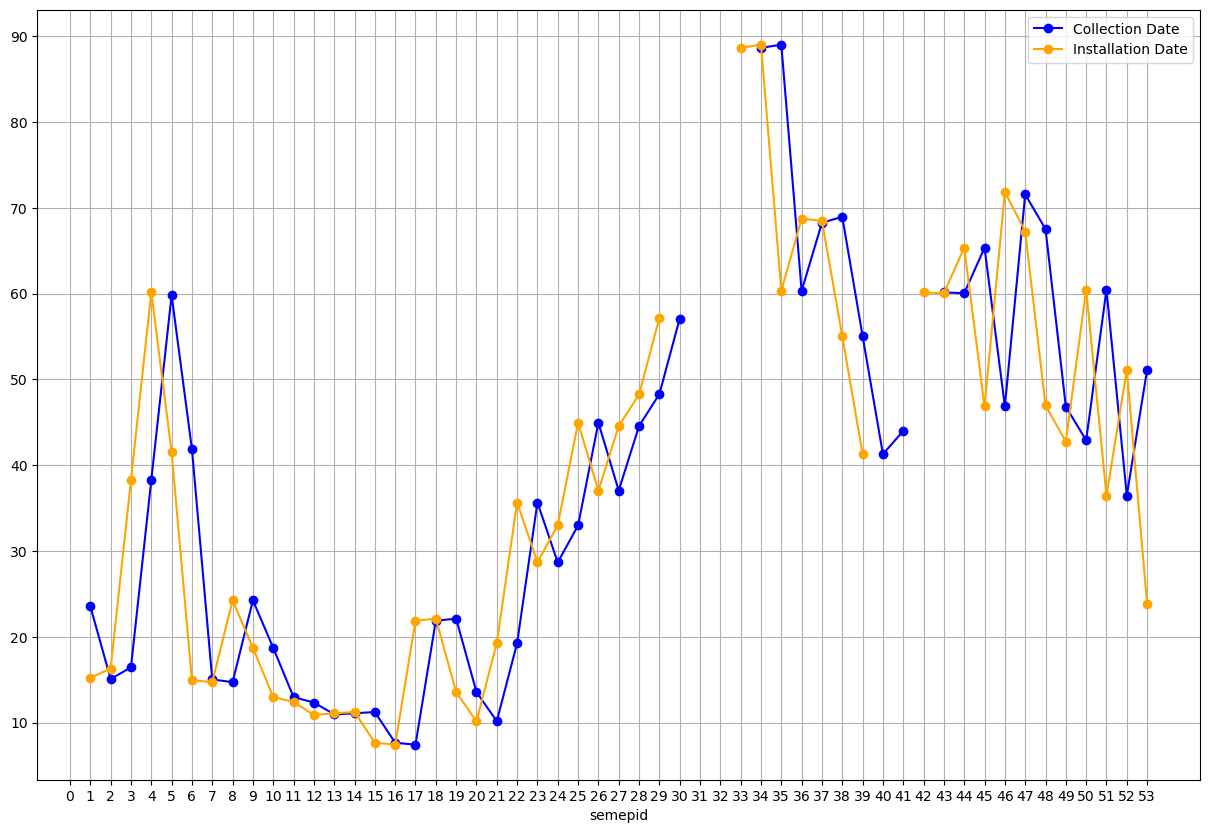




Epidemic Year: 2014_15 


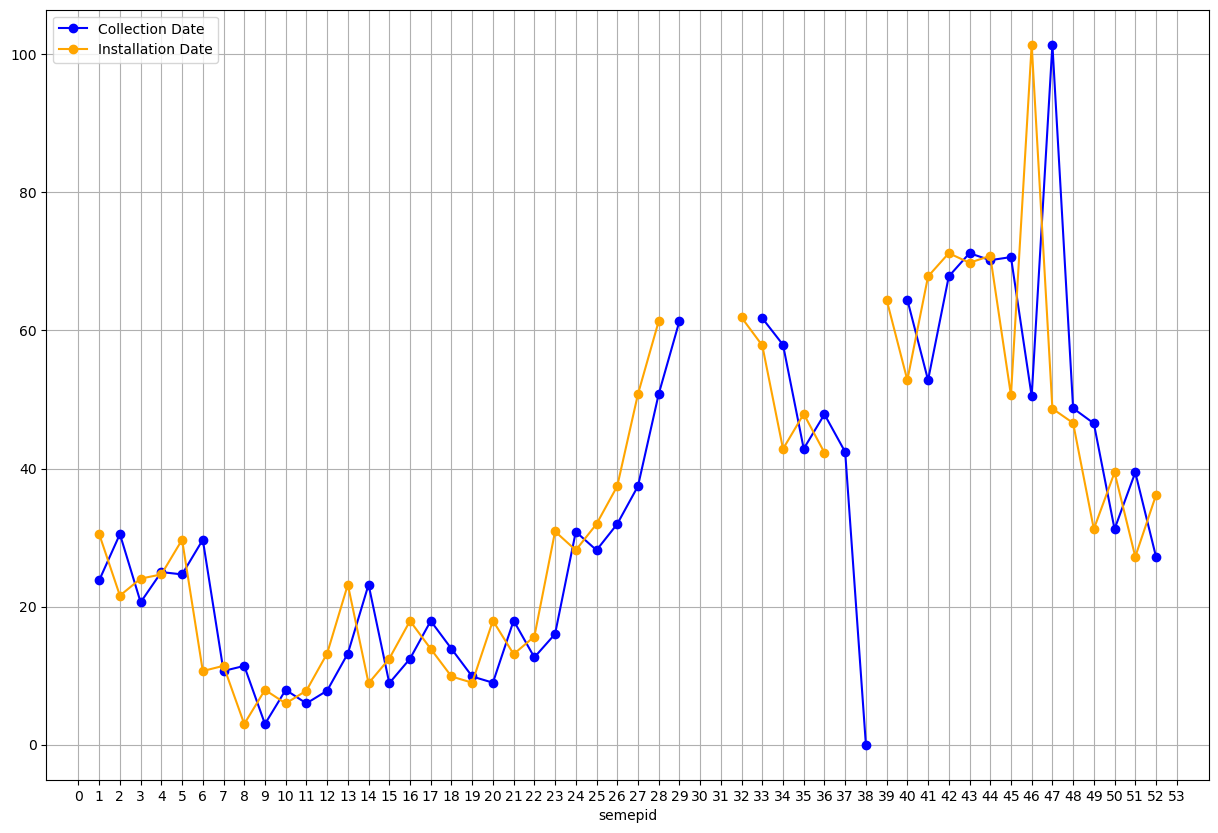




Epidemic Year: 2015_16 *


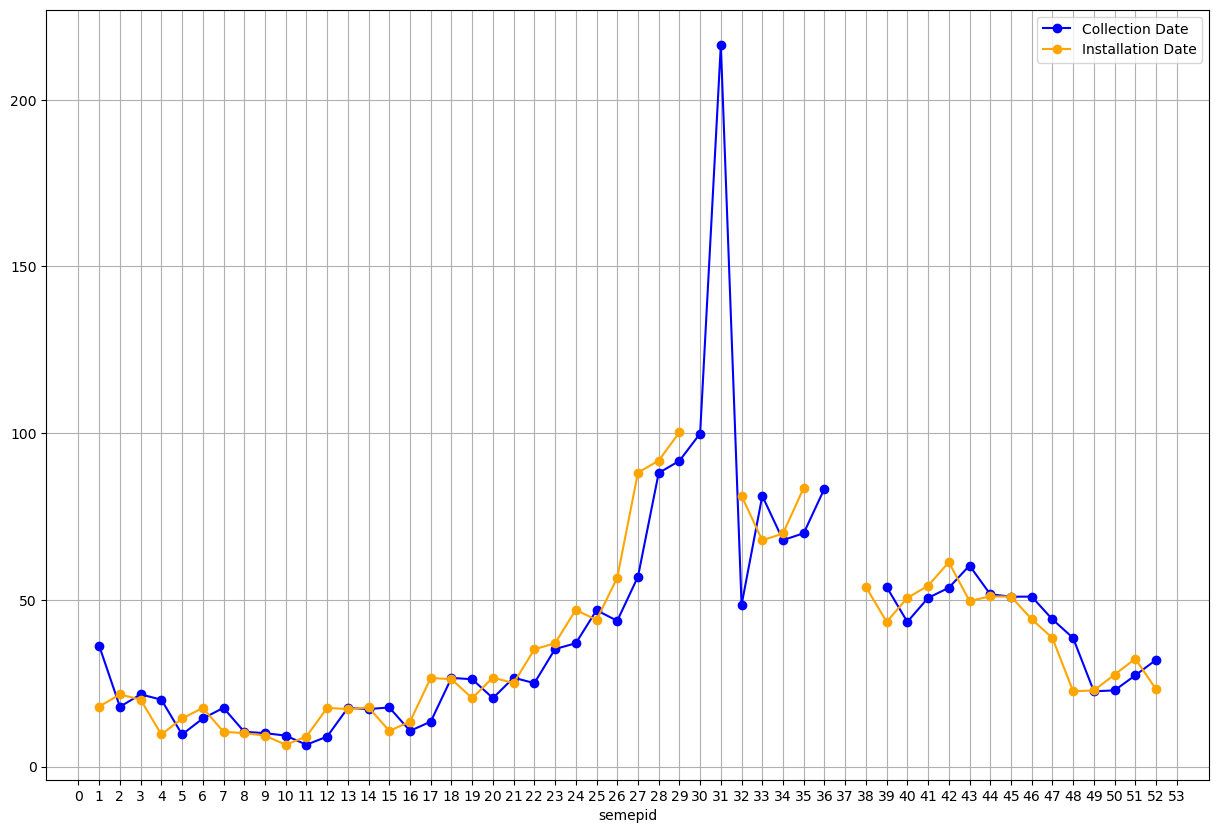




Epidemic Year: 2016_17 


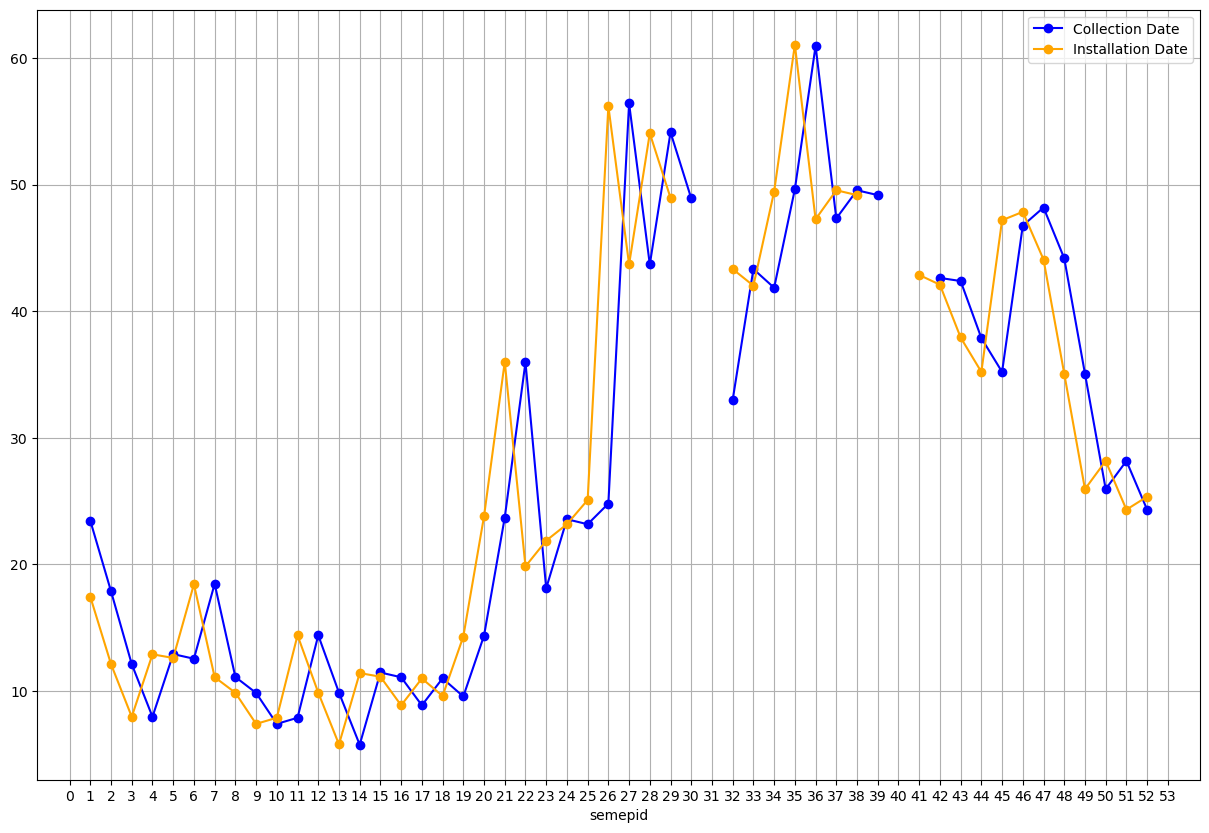




Epidemic Year: 2017_18 


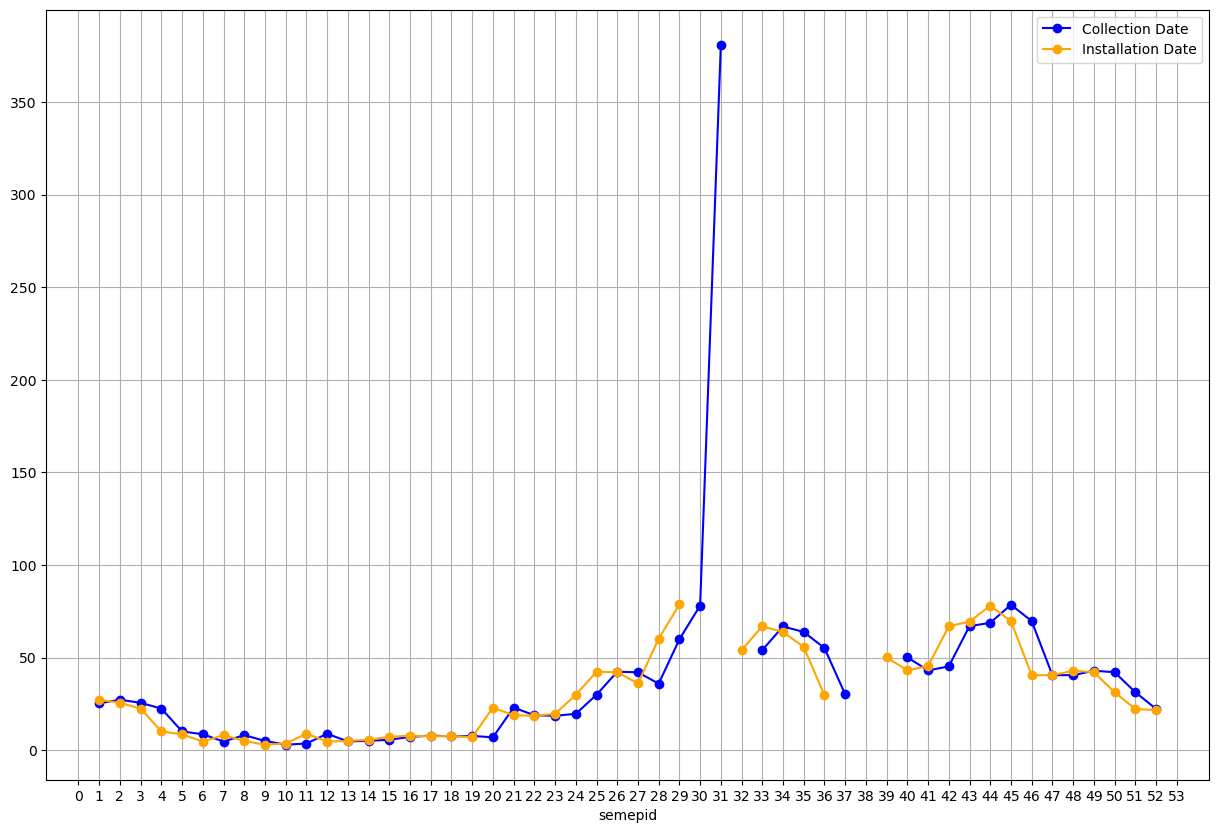




Epidemic Year: 2018_19 *


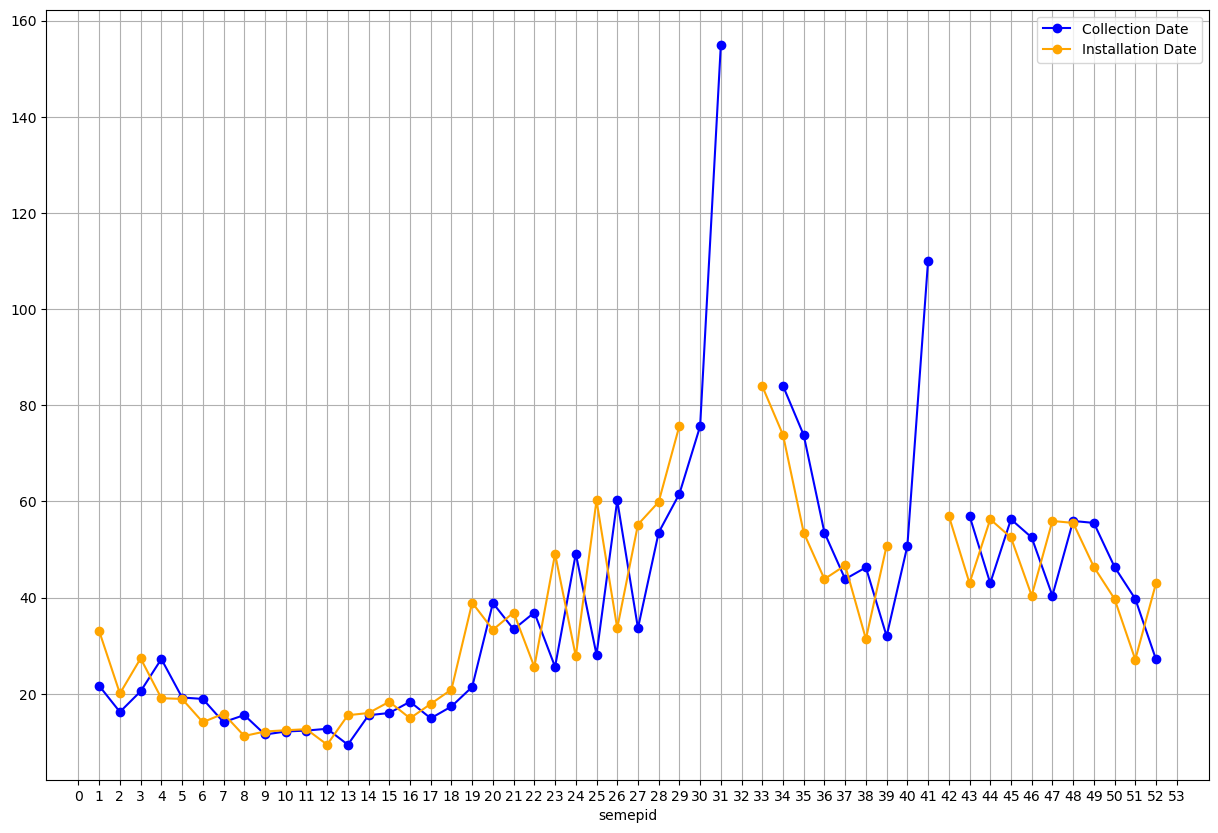




Epidemic Year: 2019_20 


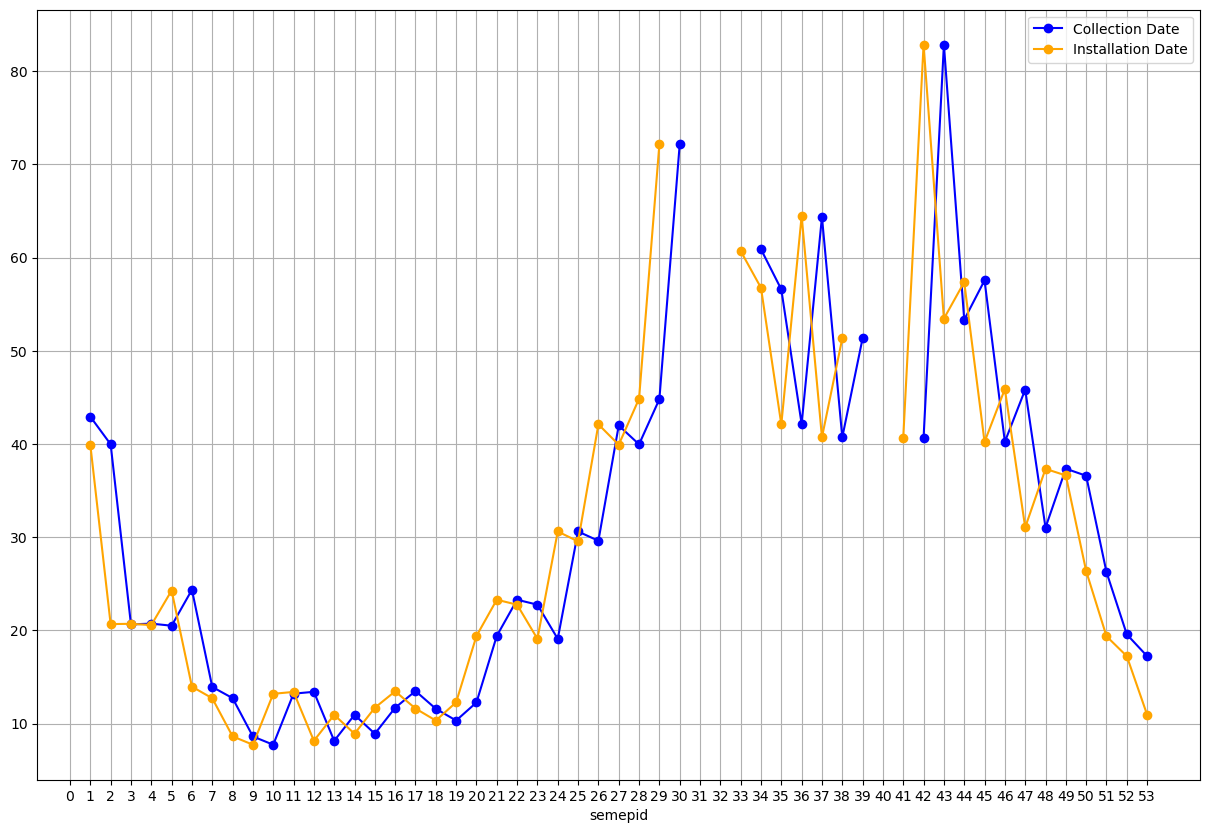




Epidemic Year: 2020_21 


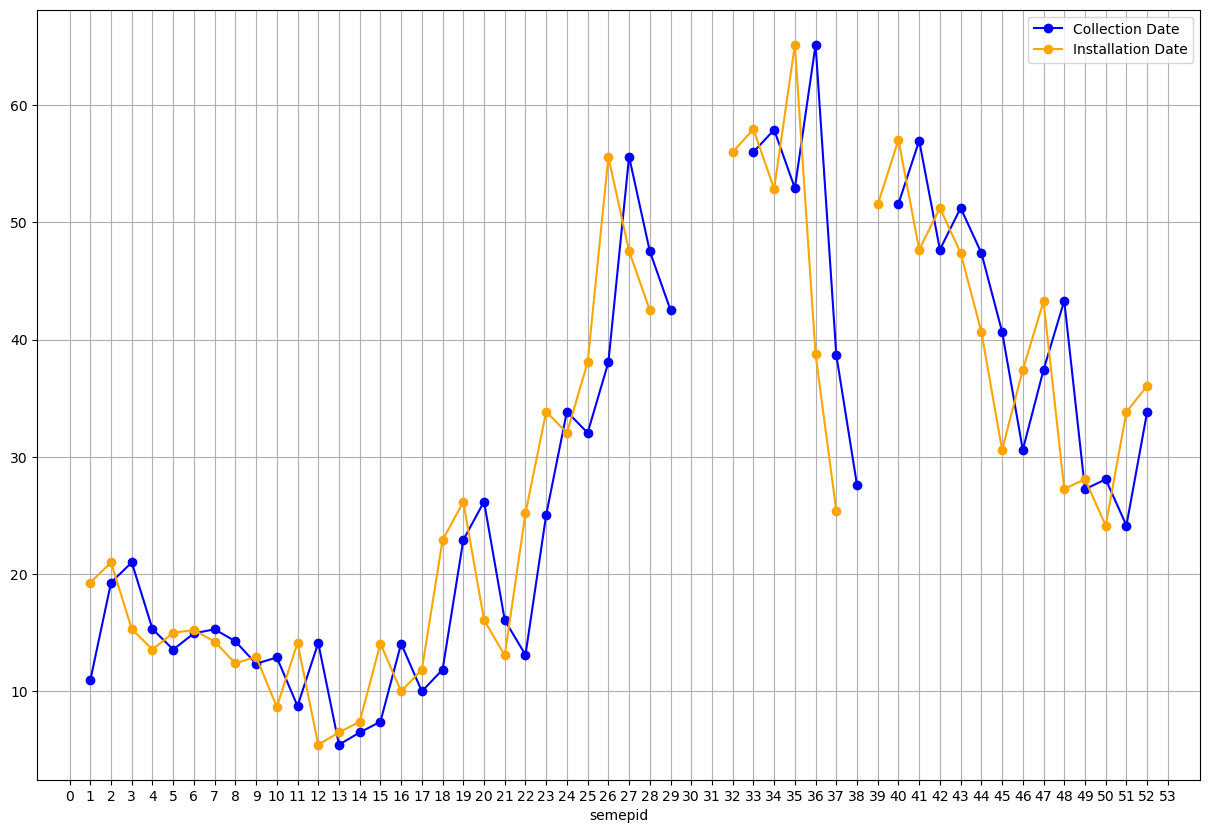




Epidemic Year: 2021_22 


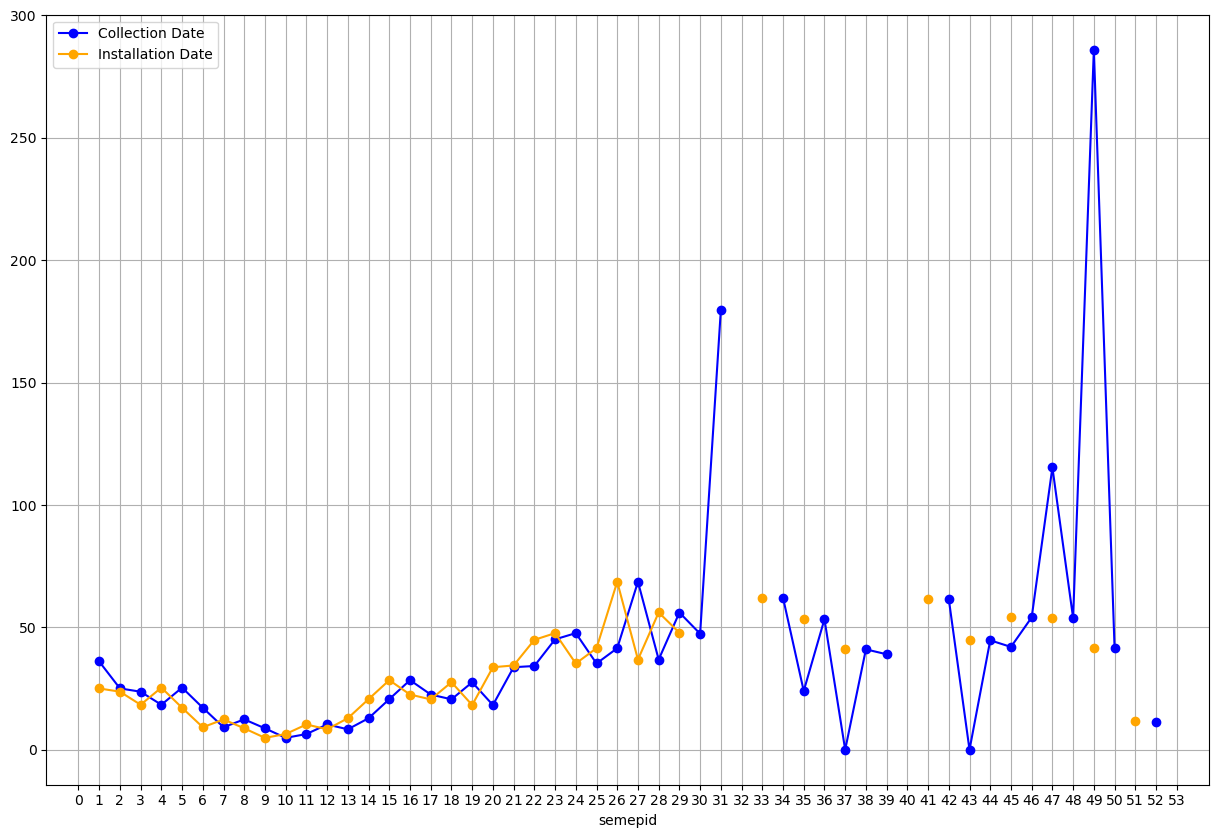




Epidemic Year: 2022_23 


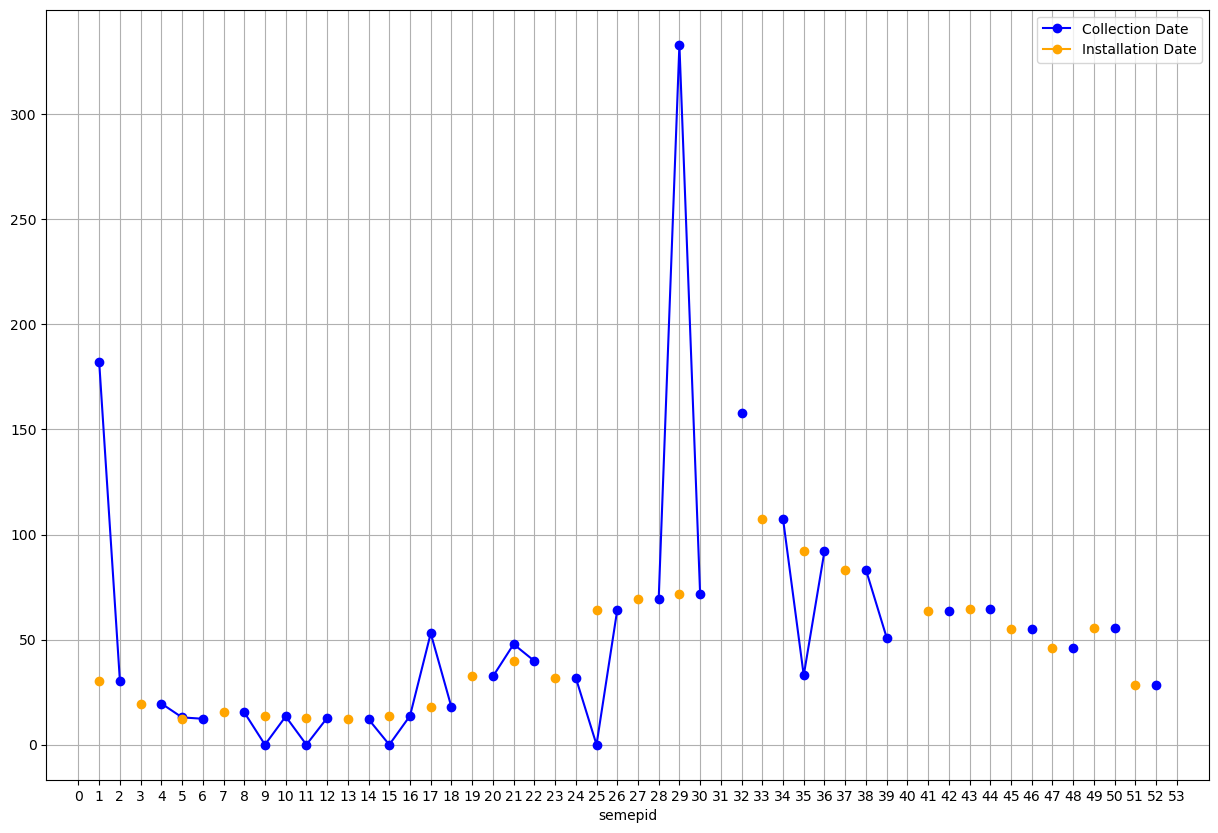




Epidemic Year: 2023_24 *


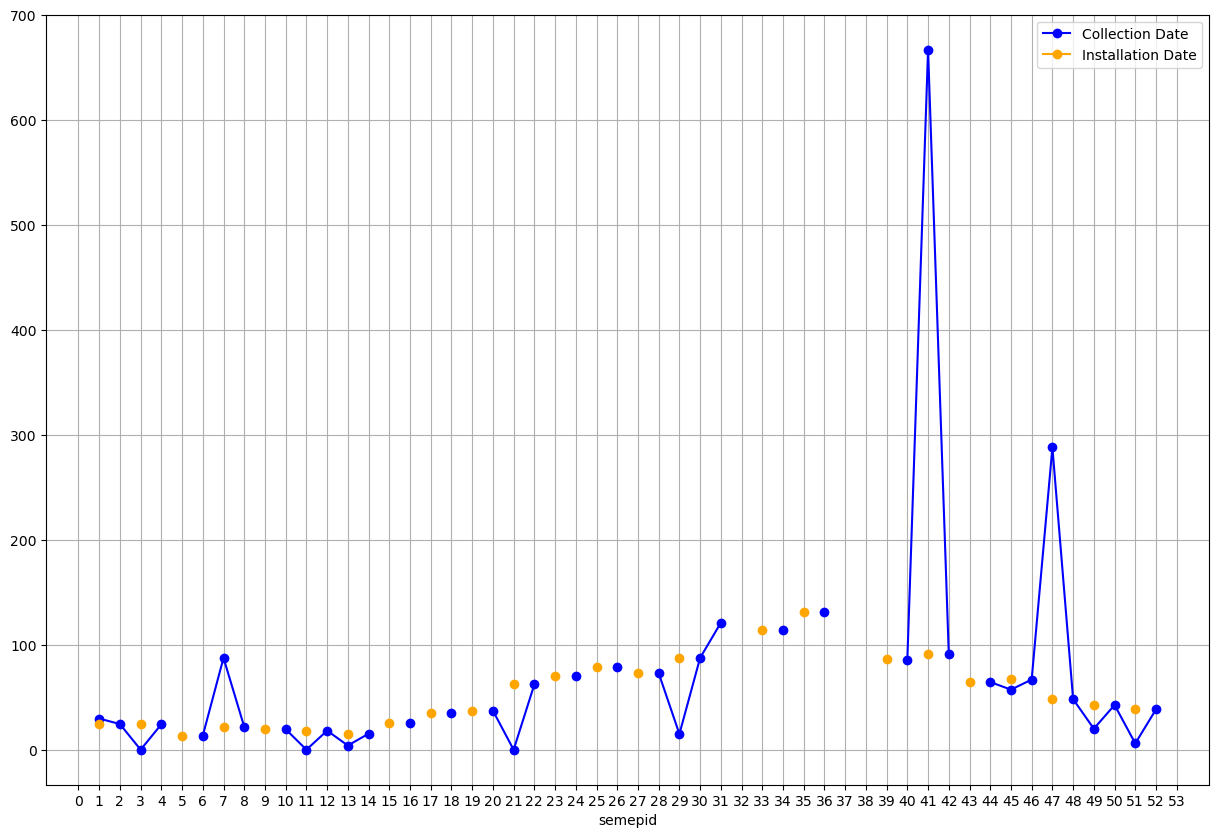




Epidemic Year: 2024_25 


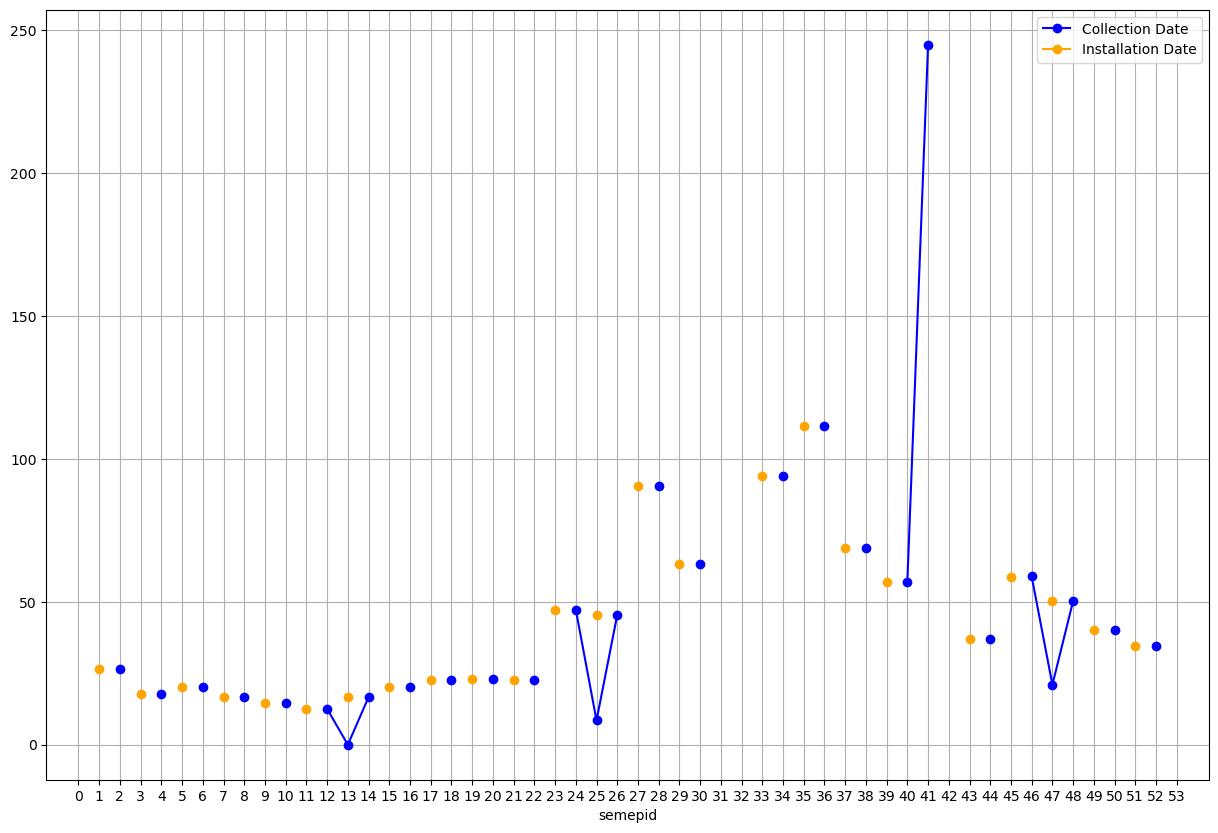

In [11]:
all_years_list = ovitraps_data_col['anoepid'].unique()
all_years_list.sort()
for anoepid in all_years_list:
    if anoepid in project_utils.EPIDEMY_YEARS:
        mark = '*'
    else:
        mark = ''
    print(f"Epidemic Year: {anoepid} {mark}")
    plt.figure(figsize=(15,10))
    ovitraps_data_col[ovitraps_data_col['anoepid'] == anoepid].groupby(['semepid'])['novos'].mean().reindex(range(1,54)).plot(label='Collection Date',marker="o", linestyle="-", color="blue")
    ovitraps_data_instal[ovitraps_data_instal['anoepid'] == anoepid].groupby(['semepid'])['novos'].mean().reindex(range(1,54)).plot(label='Installation Date',marker="o", linestyle="-", color="orange")
    plt.legend()
    plt.grid()
    plt.xticks(range(54))
    plt.show()
    print("\n\n")

## Days in each epidemic year

<Axes: title={'center': 'Days in each epidemic year for dengue cases'}>

<Figure size 500x2500 with 0 Axes>

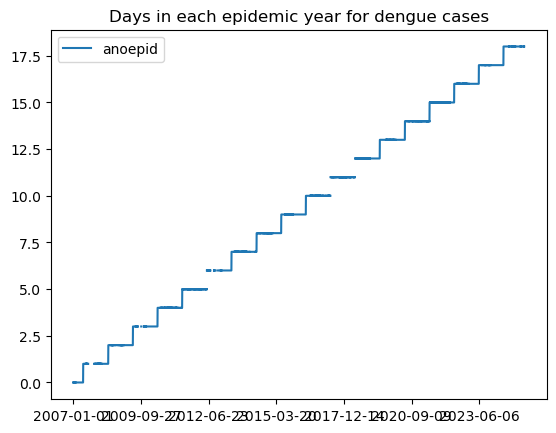

In [12]:
days_in_anoepid_dengue = dengue_data_aux[['dt_notific','anoepid']].drop_duplicates().set_index('dt_notific').sort_index()
days_in_anoepid_dengue['anoepid'] = days_in_anoepid_dengue['anoepid'].astype("category").cat.codes
# Reindex with full daily range
full_range = pd.date_range(
    start=days_in_anoepid_dengue.index.min(),
    end=days_in_anoepid_dengue.index.max(),
    freq='D'
).astype('str')
days_in_anoepid_dengue = days_in_anoepid_dengue.reindex(full_range)

plt.figure(figsize=(5, 25))
days_in_anoepid_dengue.plot(title="Days in each epidemic year for dengue cases")

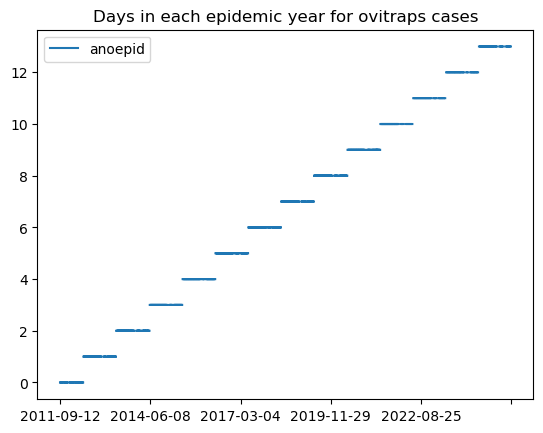

In [13]:

days_in_anoepid_ovitraps = ovitraps_data_aux[['dt_instal','anoepid']].drop_duplicates().set_index('dt_instal').sort_index()
days_in_anoepid_ovitraps['anoepid'] = days_in_anoepid_ovitraps['anoepid'].astype("category").cat.codes
# Reindex with full daily range
full_range = pd.date_range(
    start=days_in_anoepid_ovitraps.index.min(),
    end=days_in_anoepid_ovitraps.index.max(),
    freq='D'
).astype('str')

days_in_anoepid_ovitraps = days_in_anoepid_ovitraps.reindex(full_range)

days_in_anoepid_ovitraps = days_in_anoepid_ovitraps.plot(title="Days in each epidemic year for ovitraps cases")
plt.show()